In [ ]:
# Load packages
import os
import pandas as pd
import numpy as np

# This line is needed to display plots inline in Jupyter Notebook
%matplotlib inline

# Required for basic python plotting functionality
import matplotlib.pyplot as plt

# Required for formatting dates later in the case
import datetime
import matplotlib.dates as mdates

# Required to display image inline
from IPython.display import Image

# Advanced plotting functionality with seaborn
import seaborn as sns
sns.set(style="whitegrid") # can set style depending on how you'd like it to look

In [9]:
ugy=pd.read_csv("Uber_yellow_green.csv")

In [10]:
print(ugy.columns)

Index(['date', 'uberNP', 'greenNP', 'yellowNP'], dtype='object')


In [11]:
ugy.head(5)

,date,uberNP,greenNP,yellowNP
0,1/04/2014,14546,7109,23205
1,10/04/2014,20041,8404,25005
2,11/04/2014,20420,9658,25189
3,12/04/2014,18170,11327,27112
4,13/04/2014,12112,9192,23601


(array([  0.,  50., 100., 150., 200., 250., 300., 350., 400.]),
 <a list of 9 Text xticklabel objects>)

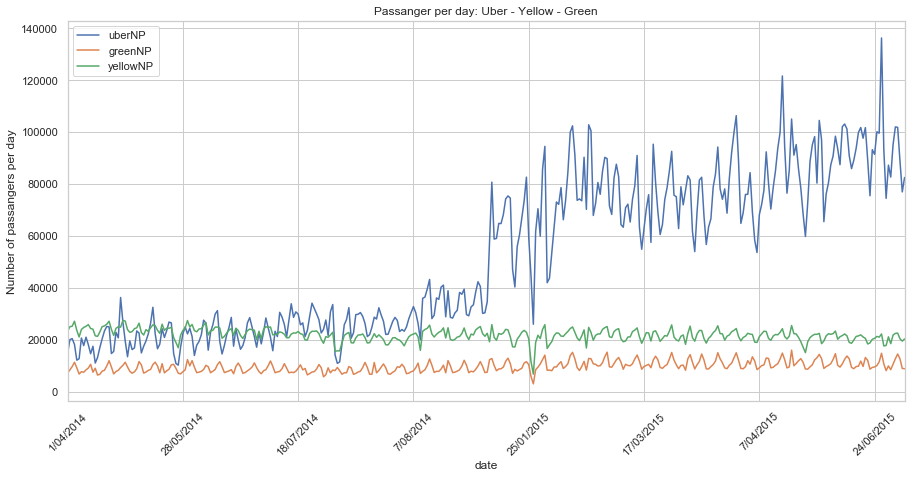

In [16]:
import pandas as pd
import numpy as  np
fig, ax = plt.subplots(figsize=(15,7))
ugy.plot("date", "uberNP",ax=ax)
ugy.plot("date", "greenNP",ax=ax)
ugy.plot("date", "yellowNP",ax=ax)
plt.title('Passanger per day: Uber - Yellow - Green');
plt.xlabel("date");
plt.ylabel("Number of passangers per day");
plt.xticks(rotation=45)


Según la gráfica, al inicio de 2014, el número de pasajeros diarios de Uber estaba por encima de los de Green pero por
debajo de los de Yellow. Le tomó unos tres meses en sobrepasar a su competencia. El gran salto de Uber ocurre en enero 
de 2015 con un aumento en el número de pasajeros de aproximadamente el 40%. Desde allí la tendencia es creciente.
Sin embargo el número de pasaeros de Yellow y Green sigue siendo el mismos. No son pasajeros que hayan cambiado de 
compañia de taxi,  son principalmento nuevos usuarios de transporte individual atraidos por Uber. 


In [24]:
ugyt=pd.read_csv("uber_green_yellow_temp.csv")

In [25]:
ugyt.head()

,date,uberNP,greenNP,yellowNP,temp,tempC
0,1/04/2014,14546,7109,23205,48.5000,L_temp
1,10/04/2014,20041,8404,25005,48.5000,L_temp
2,11/04/2014,20420,9658,25189,61.8333,L_temp
3,12/04/2014,18170,11327,27112,60.1667,L_temp
4,13/04/2014,12112,9192,23601,61.1667,L_temp


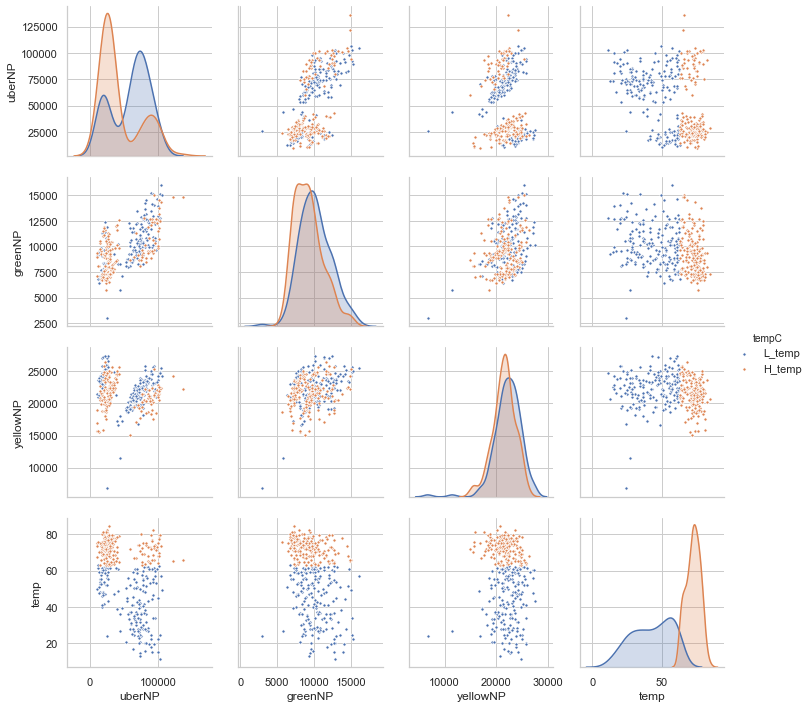

In [27]:
sns.pairplot(ugyt, hue='tempC', x_vars=['uberNP','greenNP','yellowNP','temp'], y_vars=['uberNP','greenNP','yellowNP','temp'], plot_kws={'s':10});

En Uber, la distribución del número de pasajeros por día difiere con respecto a la temperatura de los días,
es decir, los días con temperaturas más bajas se incrementea notablemente el número de pasajeros por día. 
Estas diferencias son mínimas en Yellow y Green. Es como si la demanda de viajes que sucede con las temperaturas más bajas fuera absorvida exclusivamente por Uber.

In [36]:
pd.value_counts(ugyt["tempC"])

L_temp    182
H_temp    182
Name: tempC, dtype: int64

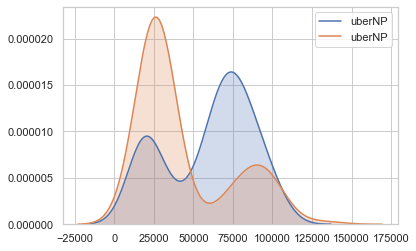

In [37]:
nuevo1=ugyt[(ugyt["tempC"]=="L_temp")]
nuevo2=ugyt[(ugyt["tempC"]=="H_temp")]
sns.kdeplot(nuevo1.uberNP,shade=True)
sns.kdeplot(nuevo2.uberNP,shade=True)